<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/SSDModelOnCityPersonDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SSD (Single Shot MultiBox Detector) Implementation on CityPerson Dataset

### Step 1: Extract and read the datasets

In [24]:
# import required libraries
import os
import zipfile
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from collections import Counter
import pandas as pd
from torchvision.models.detection.ssd import SSD300_VGG16_Weights

In [14]:
# Dataset zip files path from Google Drive
#gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'
gtBbox = '/content/drive/MyDrive/CityPersonDataset/gtBbox_cityPersons_trainval.zip'

#gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'
gtBbox_ExtPath = '/content/CityPersonDataset/gtBbox_cityPersons_trainval'

In [15]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
#extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)
extract_zip(gtBbox, gtBbox_ExtPath)

In [16]:
# List the extracted content from both datasets
#gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)
gtBbox_Files = os.listdir(gtBbox_ExtPath)

#gtFine_Files,
gtFinepano_Files, gtBbox_Files

(['license.txt', 'README_panopticParts.md', 'gtFinePanopticParts'],
 ['license.txt', 'README_cityPersons', 'gtBboxCityPersons'])

In [17]:
# Path to core folder
#gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')
gtBbox_CorePath = os.path.join(gtBbox_ExtPath, 'gtBboxCityPersons')

# List driectories inside core folders
#gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []
gtBbox_Dirs = os.listdir(gtBbox_CorePath) if os.path.exists(gtBbox_CorePath) else []

#gtFine_Dirs,
gtFinePano_Dirs, gtBbox_Dirs

(['val', 'train'], ['val', 'train'])

In [21]:
# Define the subdirectories
subdirs = gtBbox_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
#gtFine_CityFolders = {}
gtFinePano_CityFolders = {}
gtBbox_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    #gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []
    gtBbox_CityFolders[subdir] = os.listdir(os.path.join(gtBbox_CorePath, subdir)) if subdir in gtBbox_Dirs else []

# Output the first few files for each subdirectory
#gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}
gtBbox_CityFolders_Preview = {key: value[:] for key, value in gtBbox_CityFolders.items()}

#gtFine_CityFolders_Preview,
gtFinePano_CityFolders_Preview, gtBbox_CityFolders_Preview

({'val': ['lindau', 'munster', 'frankfurt'],
  'train': ['hanover',
   'strasbourg',
   'cologne',
   'bochum',
   'jena',
   'hamburg',
   'monchengladbach',
   'zurich',
   'dusseldorf',
   'weimar',
   'stuttgart',
   'erfurt',
   'darmstadt',
   'bremen',
   'aachen',
   'tubingen',
   'ulm',
   'krefeld']},
 {'val': ['lindau', 'munster', 'frankfurt'],
  'train': ['hanover',
   'strasbourg',
   'cologne',
   'bochum',
   'jena',
   'hamburg',
   'monchengladbach',
   'zurich',
   'dusseldorf',
   'weimar',
   'stuttgart',
   'erfurt',
   'darmstadt',
   'bremen',
   'aachen',
   'tubingen',
   'ulm',
   'krefeld']})

In [23]:
# Count the distribution of file types in a given directory
def count_file_types(directory):
    if not os.path.exists(directory):
      print(f"Error: Directory '{directory}' not found.")
      return None

    file_type_counts = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            file_type_counts[ext] += 1
    return file_type_counts

# # File type distribution for gtFine dataset
# print("File Type Distribution in gtFine Dataset:")
# gtFine_file_types = count_file_types(gtFine_CorePath)
# print(pd.DataFrame(gtFine_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtFinePanopticParts dataset
print("\nFile Type Distribution in gtFinePanopticParts Dataset:")
gtFinePano_file_types = count_file_types(gtFinePano_CorePath)
print(pd.DataFrame(gtFinePano_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtBboxCityPersons dataset
print("\nFile Type Distribution in gtBboxCityPersons Dataset:")
gtBbox_file_types = count_file_types(gtBbox_CorePath)
print(pd.DataFrame(gtBbox_file_types.items(), columns=["File Type", "Count"]))


File Type Distribution in gtFinePanopticParts Dataset:
  File Type  Count
0      .tif   3475

File Type Distribution in gtBboxCityPersons Dataset:
  File Type  Count
0     .json   3475


In [25]:
# Load SSD model pre-trained on COCO
model = torchvision.models.detection.ssd300_vgg16(weights=SSD300_VGG16_Weights.DEFAULT)
model.eval()  # Set to evaluation mode

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [26]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")

    transform = transforms.Compose([
        transforms.Resize((300, 300)),  # SSD300 expects 300x300 images
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    return transform(image).unsqueeze(0)  # Add batch dimension

In [31]:
# Sample image from the dataset
sample_image_path = os.path.join(gtFinePano_CorePath, "train", "aachen", "aachen_000052_000019_gtFinePanopticParts.tif")

# Preprocess the image
input_tensor = preprocess_image(sample_image_path).to(device)

# Perform inference
with torch.no_grad():
    predictions = model(input_tensor)

# Extract detections
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

# Filter detections based on confidence threshold
threshold = 0.5
filtered_indices = np.where(scores >= threshold)[0]
filtered_boxes = boxes[filtered_indices]
filtered_labels = labels[filtered_indices]
filtered_scores = scores[filtered_indices]


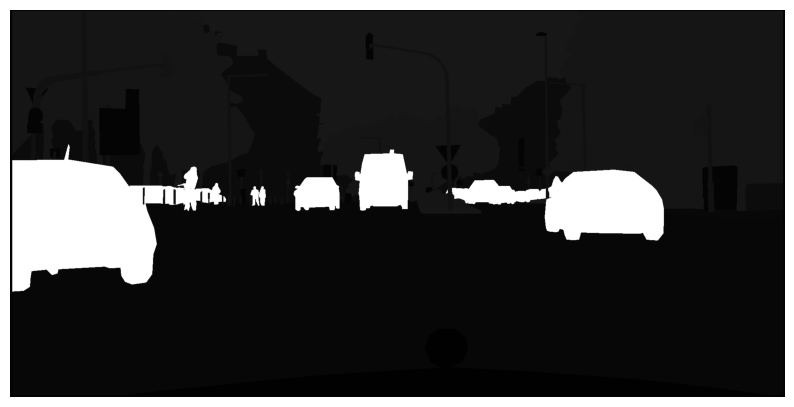

In [32]:
def draw_detections(image_path, boxes, labels, scores):
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return

    image = Image.open(image_path).convert("RGB")  # Use PIL to load .tif images
    image = np.array(image)  # Convert to NumPy array for OpenCV compatibility

    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i].astype(int)
        label = labels[i]
        score = scores[i]

        # Draw bounding box using OpenCV
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"Person: {score:.2f}"
        cv2.putText(image, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Test again
draw_detections(sample_image_path, filtered_boxes, filtered_labels, filtered_scores)